# SimAI-Bench GNN Scaling

In [1]:
# Set up notebook
import os
import pathlib
import glob
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

from datetime import datetime

font = {
        'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

import matplotlib.font_manager
# matplotlib.font_manager.fontManager.ttflist

In [2]:
class SimAIBench_GNN:
    def __init__(self,path,gpu_list):
        self.base_path = path
        self.gpu_list = gpu_list
        self.n_gpu = len(gpu_list)
        self.train_fom = {
            'train_loop': np.zeros((self.n_gpu,4)),
            'train_tot': np.zeros((self.n_gpu,4)),
            'train_iter': np.zeros((self.n_gpu,4)),
            'throughput_iter': np.zeros((self.n_gpu,4)),
            'throughput_par': np.zeros((self.n_gpu,)),
            'forward_pass': np.zeros((self.n_gpu,4)),
            'loss': np.zeros((self.n_gpu,4)),
            'backward_pass': np.zeros((self.n_gpu,4)),
            'optimizer_step': np.zeros((self.n_gpu,4)),
            'collectives': np.zeros((self.n_gpu,4)),
        }
        
    def get_value(self,string):
        return float(string.split(":")[1].strip())
    
    def get_values(self,string):
        vals = string.split(":")[1].split(",")
        arr = np.zeros((4,))
        for i in range(4):
            arr[i] = float(vals[i].split('=')[-1].strip())
        return arr
    
    def parse_files(self):
        counts = np.zeros((self.n_gpu,))
        for i in range(self.n_gpu):
            path = self.base_path+f"/{self.gpu_list[i]}/gnn_scale.*"
            # Loop over runs found
            run_files = glob.glob(path)
            for run_file in run_files:
                print('Reading file: ', run_file)
                with open(run_file,'r') as fh:
                    for l in fh:
                        if "training_loop" in l:
                            self.train_fom['train_loop'][i] += self.get_values(l)
                            counts[i] += 1
                        if "train_tot" in l:
                            self.train_fom['train_tot'][i] += self.get_values(l)
                        if "train_iter" in l:
                            self.train_fom['train_iter'][i] += self.get_values(l)
                        if "throughput_iter" in l:
                            self.train_fom['throughput_iter'][i] += self.get_values(l)
                        if "Average parallel training throughout" in l:
                            self.train_fom['throughput_par'][i] += self.get_value(l)
                        if "forward_pass" in l:
                            self.train_fom['forward_pass'][i] += self.get_values(l)
                        if "loss [" in l:
                            self.train_fom['loss'][i] += self.get_values(l)
                        if "backward_pass" in l:
                            self.train_fom['backward_pass'][i] += self.get_values(l)
                        if "optimizer_step" in l:
                            self.train_fom['optimizer_step'][i] += self.get_values(l)
                        if "collectives" in l:
                            self.train_fom['collectives'][i] += self.get_values(l)

        # Divide by the counts for each gpu number to get the average over runs
        for key in self.train_fom.keys():
            val = self.train_fom[key]
            if len(val.shape)==1:
                self.train_fom[key] = np.divide(val, counts, where=counts>0)
            else:
                for j in range(val.shape[1]):
                    self.train_fom[key][:,j] = np.divide(val[:,j], counts, where=counts>0)
        
#    def compute_scaling_efficiency(self):
#        self.sim_runtime_eta = self.sim_runtime/self.sim_runtime[0]
#        self.sim_steps_eta = self.sim_steps/self.sim_steps[0]
#        self.sim_sr_init_eta = self.sim_sr_init/self.sim_sr_init[0]
#        self.sim_sr_meta_eta = self.sim_sr_meta/self.sim_sr_meta[0]
#        self.sim_sr_train_eta = self.sim_sr_train/self.sim_sr_train[0]
#        self.ml_runtime_eta = self.ml_runtime/self.ml_runtime[0]
#        self.ml_sr_init_eta = self.ml_sr_init/self.ml_sr_init[0]
#        self.ml_sr_meta_eta = self.ml_sr_meta/self.ml_sr_meta[0]
#        self.ml_sr_train_eta = self.ml_sr_train/self.ml_sr_train[0]

In [28]:
# Test class
top_dir = "/Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large"
gpu_list = [1,2,4]
workflow = SimAIBench_GNN(top_dir,gpu_list)
workflow.parse_files()
print(workflow.train_fom)

Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/1/gnn_scale.o2000675
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/1/gnn_scale.o2001697
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/2/gnn_scale.o2000675
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/2/gnn_scale.o2001697
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/4/gnn_scale.o2000675
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/4/gnn_scale.o1993739
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/4/gnn_scale.o2001697
{'train_loop': array([[67.81013   , 67.81013   , 67.81013   ,  0.        ],
       [67.666295  , 67.84934   , 67.757815  ,  0.09152106],
       [60.37153333, 60.55585667, 60.41797667,  0.07960652]]), 'train_to

## Load All Data

In [3]:
top_dir = "/Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/"

In [8]:
#### Polaris
# SimAI-Bench Model, Large Config, loss average NOT included in throughput
case_dir = "polaris/large"
dir_path = top_dir + case_dir
gpu_list = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1536]
polaris = SimAIBench_GNN(dir_path,gpu_list)
polaris.parse_files()

# SimAI-Bench Model, Large Config, loss average included in throughput
case_dir = "polaris_2/large"
dir_path = top_dir + case_dir
gpu_list = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1536]
polaris2 = SimAIBench_GNN(dir_path,gpu_list)
polaris2.parse_files()

#### Aurora
# SimAI-Bench Model, Large Config, loss average NOT included in throughput
case_dir = "aurora/large"
dir_path = top_dir + case_dir
gpu_list = [0.5, 1, 3, 6, 12, 24, 48, 96, 192, 384, 768, 1536, 3072]
aurora = SimAIBench_GNN(dir_path,gpu_list)
aurora.parse_files()

# SimAI-Bench Model, Large Config, loss average NOT included in throughput, eng drop oneCCL
case_dir = "aurora_engOneCLL/large"
dir_path = top_dir + case_dir
gpu_list = [0.5, 1, 3, 6, 12, 24, 48, 96, 192, 384, 768, 1536, 3072]
aurora_ccl = SimAIBench_GNN(dir_path,gpu_list)
aurora_ccl.parse_files()

# SimAI-Bench Model, Large Config, loss average included in throughput, eng drop oneCCL
case_dir = "aurora_engOneCLL_2/large"
dir_path = top_dir + case_dir
gpu_list = [0.5, 1, 3, 6, 12, 24, 48, 96, 192, 384, 768, 1536, 3072]
aurora_ccl2 = SimAIBench_GNN(dir_path,gpu_list)
aurora_ccl2.parse_files()

Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/1/gnn_scale.o2000675
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/1/gnn_scale.o2001697
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/2/gnn_scale.o2000675
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/2/gnn_scale.o2001697
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/4/gnn_scale.o2000675
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/4/gnn_scale.o1993739
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/4/gnn_scale.o2001697
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/8/gnn_scale.o2003175
Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/polaris/large/16/g

Reading file:  /Users/rbalin/Documents/Research/ALCF/Nek/GNN/SimAI-Bench/runs/aurora_engOneCLL_2/large/3072/gnn_scale.o700426


In [30]:
print(*polaris.train_fom['throughput_par'])

0.020411745000000002 0.02047453 0.02044576 1.3367505e-05 0.006242731 0.006686056500000001 0.00631949 0.0001419631 0.004161405666666667 0.004464434 0.004215557666666667 9.424543333333333e-05


In [7]:
print(*polaris2.train_fom['throughput_par'])

1746935.0 2699244.0 4916480.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0


In [8]:
print(*aurora.train_fom['throughput_par'])

15286270.0 2306201.0 6896157.0 13750410.0 27570130.0 55151550.0 110217300.0 219748300.0 442288850.0 886508850.0 1781176500.0 3562224333.3333335 7116330000.0


In [9]:
print(*aurora_ccl.train_fom['throughput_par'])

15092270.0 26384970.0 78513100.0 154750600.0 311713000.0 631238900.0 1251621000.0 2485869000.0 4960419000.0 9860177000.0 19541710000.0 38783740000.0 76559216666.66667


In [10]:
print(*aurora_ccl2.train_fom['throughput_par'])

15221750.0 2335803.0 6951815.0 13891990.0 27600150.0 55415340.0 110366400.0 220721100.0 442124900.0 882686000.0 1775368000.0 3546632000.0 7058546000.0


## Scale-Up of SimAI-Bench GNN (Single Node)

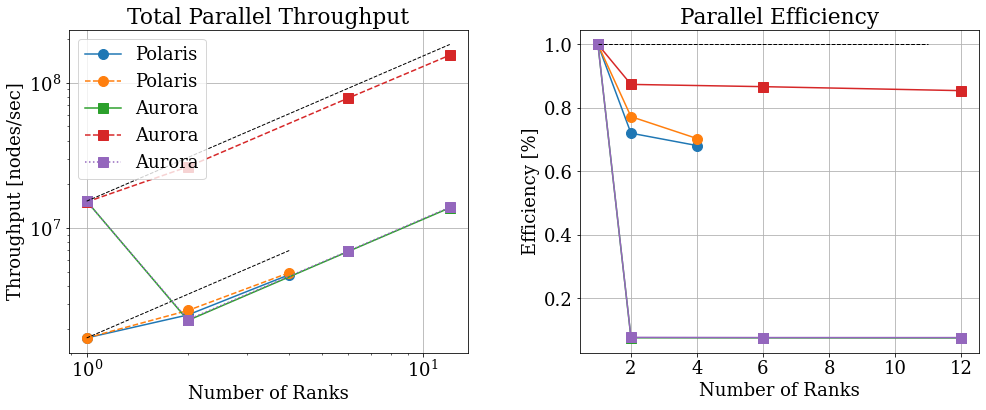

In [24]:
# Average parallel training throughput

polaris_gpu_list = [1, 2, 4]
aurora_gpu_list = [0.5, 1, 3, 6]
aurora_rank_list = [1, 2, 6, 12]

polaris_serial = polaris.train_fom['throughput_par'][0]
polaris_ideal = [polaris_gpu_list[i]*polaris_serial for i in range(len(polaris_gpu_list))]
polaris2_serial = polaris2.train_fom['throughput_par'][0]
polaris2_ideal = [polaris_gpu_list[i]*polaris2_serial for i in range(len(polaris_gpu_list))]

aurora_serial = aurora.train_fom['throughput_par'][0]
aurora_ideal = [aurora_gpu_list[i]/aurora_gpu_list[0]*aurora_serial for i in range(len(aurora_gpu_list))]
aurora_ccl_serial = aurora_ccl.train_fom['throughput_par'][0]
aurora_ccl_ideal = [aurora_gpu_list[i]/aurora_gpu_list[0]*aurora_ccl_serial for i in range(len(aurora_gpu_list))]
aurora_ccl2_serial = aurora_ccl2.train_fom['throughput_par'][0]
aurora_ccl2_ideal = [aurora_gpu_list[i]/aurora_gpu_list[0]*aurora_ccl2_serial for i in range(len(aurora_gpu_list))]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
axs[0].plot(polaris_gpu_list, polaris.train_fom['throughput_par'][:3],label = "Polaris",marker="o",ls="-",markersize=10)
axs[0].plot(polaris_gpu_list, polaris2.train_fom['throughput_par'][:3],label = "Polaris",marker="o",ls="--",markersize=10)
axs[0].plot(polaris_gpu_list, polaris_ideal,c="k",ls="--",linewidth=1)
axs[0].plot(aurora_rank_list, aurora.train_fom['throughput_par'][:4],label = "Aurora",marker="s",ls="-",markersize=10)
axs[0].plot(aurora_rank_list, aurora_ccl.train_fom['throughput_par'][:4],label = "Aurora",marker="s",ls="--",markersize=10)
axs[0].plot(aurora_rank_list, aurora_ccl2.train_fom['throughput_par'][:4],label = "Aurora",marker="s",ls=":",markersize=10)
axs[0].plot(aurora_rank_list, aurora_ideal,c="k",ls="--",linewidth=1)

axs[1].plot(polaris_gpu_list, polaris.train_fom['throughput_par'][:3]/polaris_ideal,label = "Polaris",marker="o",ls="-",markersize=10)
axs[1].plot(polaris_gpu_list, polaris2.train_fom['throughput_par'][:3]/polaris2_ideal,label = "Polaris",marker="o",ls="-",markersize=10)
axs[1].plot(aurora_rank_list, aurora.train_fom['throughput_par'][:4]/aurora_ideal,label = "Aurora",marker="s",ls="-",markersize=10)
axs[1].plot(aurora_rank_list, aurora_ccl.train_fom['throughput_par'][:4]/aurora_ccl_ideal,label = "Aurora",marker="s",ls="-",markersize=10)
axs[1].plot(aurora_rank_list, aurora_ccl2.train_fom['throughput_par'][:4]/aurora_ccl2_ideal,label = "Aurora",marker="s",ls="-",markersize=10)
axs[1].plot([i for i in range(1,12)], [1 for i in range(1,12)],c="k",ls="--",linewidth=1)


for i in range(2):
    #axs[i].set_xscale("log")
    axs[i].grid()
    axs[i].set_xlabel('Number of Ranks')

axs[0].set_xscale("log")
axs[0].set_yscale("log")
#fig.legend(bbox_to_anchor=(1.25,0.7))
axs[0].legend(loc='upper left')
axs[0].set_ylabel('Throughput [nodes/sec]')
axs[0].set_title('Total Parallel Throughput')
axs[1].set_ylabel('Efficiency [%]')
axs[1].set_title('Parallel Efficiency')
fig.tight_layout(pad=3.0)

In [ ]:
# Training and throughput iteration

polaris_gpu_list = [1, 2, 4]
aurora_gpu_list = [0.5, 1, 3, 6]
aurora_rank_list = [1, 2, 6, 12]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
axs[0].errorbar(polaris_gpu_list, polaris.train_fom['train_iter'][:3,2],polaris.train_fom['train_iter'][:3,3],label = "Polaris",marker="o",ls="-",markersize=10)
axs[0].errorbar(aurora_rank_list, aurora.train_fom['train_iter'][:4,2],aurora.train_fom['train_iter'][:4,3],label = "Aurora",marker="s",ls="-",markersize=10)

axs[1].errorbar(polaris_gpu_list, polaris.train_fom['throughput_iter'][:3,2],polaris.train_fom['throughput_iter'][:3,3],label = "Polaris",marker="o",ls="-",markersize=10)
axs[1].errorbar(aurora_rank_list, aurora.train_fom['throughput_iter'][:4,2],aurora.train_fom['throughput_iter'][:4,3],label = "Aurora",marker="s",ls="-",markersize=10)


for i in range(2):
    #axs[i].set_xscale("log")
    axs[i].grid()
    axs[i].set_xlabel('Number of Ranks')

#axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#fig.legend(bbox_to_anchor=(1.25,0.7))
axs[0].legend(loc='lower right')
axs[0].set_ylabel('Time [sec]')
axs[0].set_title('Averege Iteration Time')
axs[1].set_ylabel('Throbughput [nodes/sec]')
axs[1].set_title('Average Iteration Throughput')
fig.tight_layout(pad=3.0)

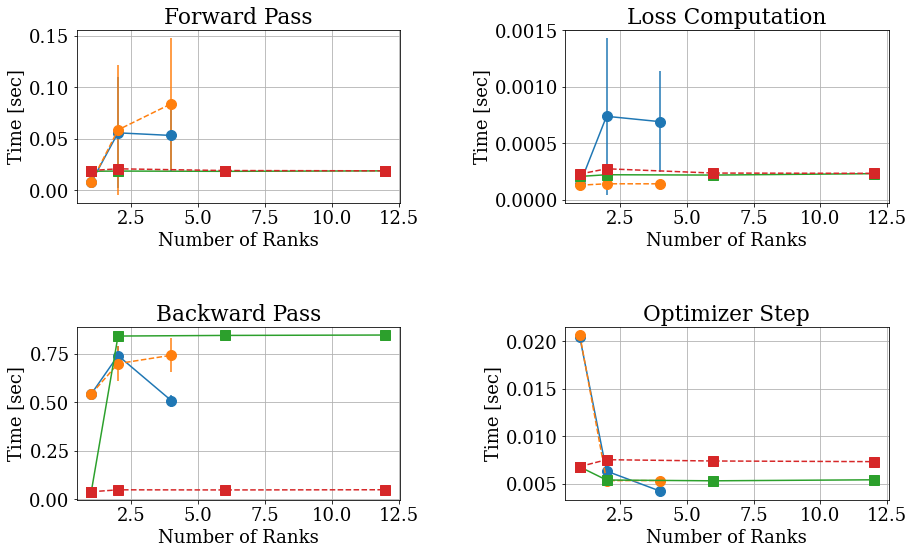

In [36]:
# Iteration timings

polaris_gpu_list = [1, 2, 4]
aurora_gpu_list = [0.5, 1, 3, 6]
aurora_rank_list = [1, 2, 6, 12]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 9))
axs[0,0].errorbar(polaris_gpu_list, polaris.train_fom['forward_pass'][:3,2],polaris.train_fom['forward_pass'][:3,3],label = "Polaris",marker="o",ls="-",markersize=10)
axs[0,0].errorbar(polaris_gpu_list, polaris2.train_fom['forward_pass'][:3,2],polaris2.train_fom['forward_pass'][:3,3],label = "Polaris",marker="o",ls="--",markersize=10)
axs[0,0].errorbar(aurora_rank_list, aurora.train_fom['forward_pass'][:4,2],aurora.train_fom['forward_pass'][:4,3],label = "Aurora",marker="s",ls="-",markersize=10)
axs[0,0].errorbar(aurora_rank_list, aurora_ccl2.train_fom['forward_pass'][:4,2],aurora_ccl2.train_fom['forward_pass'][:4,3],label = "Aurora",marker="s",ls="--",markersize=10)

axs[0,1].errorbar(polaris_gpu_list, polaris.train_fom['loss'][:3,2],polaris.train_fom['loss'][:3,3],label = "Polaris",marker="o",ls="-",markersize=10)
axs[0,1].errorbar(polaris_gpu_list, polaris2.train_fom['loss'][:3,2],polaris2.train_fom['loss'][:3,3],label = "Polaris",marker="o",ls="--",markersize=10)
axs[0,1].errorbar(aurora_rank_list, aurora.train_fom['loss'][:4,2],aurora.train_fom['loss'][:4,3],label = "Aurora",marker="s",ls="-",markersize=10)
axs[0,1].errorbar(aurora_rank_list, aurora_ccl2.train_fom['loss'][:4,2],aurora_ccl2.train_fom['loss'][:4,3],label = "Aurora",marker="s",ls="--",markersize=10)

axs[1,0].errorbar(polaris_gpu_list, polaris.train_fom['backward_pass'][:3,2],polaris.train_fom['backward_pass'][:3,3],label = "Polaris",marker="o",ls="-",markersize=10)
axs[1,0].errorbar(polaris_gpu_list, polaris2.train_fom['backward_pass'][:3,2],polaris2.train_fom['backward_pass'][:3,3],label = "Polaris",marker="o",ls="--",markersize=10)
axs[1,0].errorbar(aurora_rank_list, aurora.train_fom['backward_pass'][:4,2],aurora.train_fom['backward_pass'][:4,3],label = "Aurora",marker="s",ls="-",markersize=10)
axs[1,0].errorbar(aurora_rank_list, aurora_ccl2.train_fom['backward_pass'][:4,2],aurora_ccl2.train_fom['backward_pass'][:4,3],label = "Aurora",marker="s",ls="--",markersize=10)


axs[1,1].errorbar(polaris_gpu_list, polaris.train_fom['optimizer_step'][:3,2],polaris.train_fom['optimizer_step'][:3,3],label = "Polaris",marker="o",ls="-",markersize=10)
axs[1,1].errorbar(polaris_gpu_list, polaris2.train_fom['optimizer_step'][:3,2],polaris2.train_fom['optimizer_step'][:3,3],label = "Polaris",marker="o",ls="--",markersize=10)
axs[1,1].errorbar(aurora_rank_list, aurora.train_fom['optimizer_step'][:4,2],aurora.train_fom['optimizer_step'][:4,3],label = "Aurora",marker="s",ls="-",markersize=10)
axs[1,1].errorbar(aurora_rank_list, aurora_ccl2.train_fom['optimizer_step'][:4,2],aurora_ccl2.train_fom['optimizer_step'][:4,3],label = "Aurora",marker="s",ls="--",markersize=10)


for i in range(2):
    for j in range(2):
    #axs[i].set_xscale("log")
        axs[i,j].grid()
        axs[i,j].set_xlabel('Number of Ranks')
        axs[i,j].set_ylabel('Time [sec]')

axs[0,0].set_title('Forward Pass')
axs[0,1].set_title('Loss Computation')
axs[1,0].set_title('Backward Pass')
axs[1,1].set_title('Optimizer Step')
fig.tight_layout(pad=3.0)

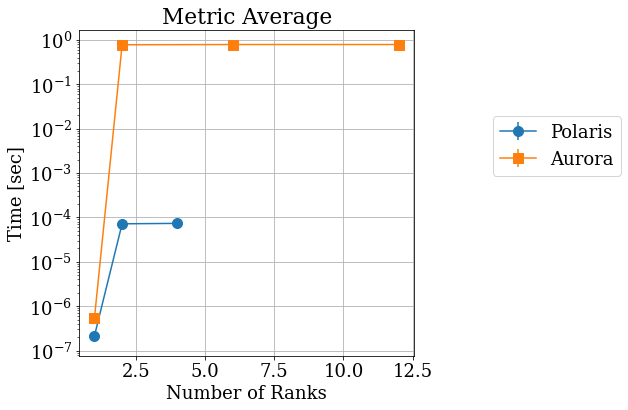

In [22]:
# Metric average for loss

polaris_gpu_list = [1, 2, 4]
aurora_gpu_list = [0.5, 1, 3, 6]
aurora_rank_list = [1, 2, 6, 12]

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
axs.errorbar(polaris_gpu_list, polaris2.train_fom['collectives'][:3,2],polaris2.train_fom['collectives'][:3,3],label = "Polaris",marker="o",ls="-",markersize=10)
axs.errorbar(aurora_rank_list, aurora_ccl2.train_fom['collectives'][:4,2],aurora_ccl2.train_fom['collectives'][:4,3],label = "Aurora",marker="s",ls="-",markersize=10)

axs.set_yscale("log")
axs.grid()
axs.set_xlabel('Number of Ranks')
axs.set_ylabel('Time [sec]')

axs.set_title('Metric Average')
fig.legend(bbox_to_anchor=(1.4,0.7))
#axs[0,1].set_title('Loss Computation')
#axs[1,0].set_title('Backward Pass')
#axs[1,1].set_title('Optimizer Step')
#fig.tight_layout(pad=3.0)

In [ ]:
# Iteration timings (single plot)

polaris_gpu_list = [1, 2, 4]
aurora_gpu_list = [0.5, 1, 3, 6]
aurora_rank_list = [1, 2, 6, 12]

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
axs.errorbar(polaris_gpu_list, polaris.train_fom['forward_pass'][:3,2],polaris.train_fom['forward_pass'][:3,3],label = "Polaris fwd.",marker="o",ls="-",markersize=10)
axs.errorbar(aurora_rank_list, aurora.train_fom['forward_pass'][:4,2],aurora.train_fom['forward_pass'][:4,3],label = "Aurora fwd.",marker="s",ls="-",markersize=10)

axs.errorbar(polaris_gpu_list, polaris.train_fom['loss'][:3,2],polaris.train_fom['loss'][:3,3],label = "Polaris loss",marker="o",ls="--",markersize=10)
axs.errorbar(aurora_rank_list, aurora.train_fom['loss'][:4,2],aurora.train_fom['loss'][:4,3],label = "Aurora loss",marker="s",ls="--",markersize=10)

axs.errorbar(polaris_gpu_list, polaris.train_fom['backward_pass'][:3,2],polaris.train_fom['backward_pass'][:3,3],label = "Polaris bkwd.",marker="o",ls=":",markersize=10)
axs.errorbar(aurora_rank_list, aurora.train_fom['backward_pass'][:4,2],aurora.train_fom['backward_pass'][:4,3],label = "Aurora bkwd.",marker="s",ls=":",markersize=10)

axs.errorbar(polaris_gpu_list, polaris.train_fom['optimizer_step'][:3,2],polaris.train_fom['optimizer_step'][:3,3],label = "Polaris opt.",marker="o",ls="-.",markersize=10)
axs.errorbar(aurora_rank_list, aurora.train_fom['optimizer_step'][:4,2],aurora.train_fom['optimizer_step'][:4,3],label = "Aurora opt.",marker="s",ls="-.",markersize=10)

axs.set_yscale("log")
axs.grid()
axs.set_xlabel('Number of Ranks')
axs.set_ylabel('Time [sec]')

axs.set_title('Training Step Breakdown Timings')
fig.legend(bbox_to_anchor=(1.4,0.7))
#axs[0,1].set_title('Loss Computation')
#axs[1,0].set_title('Backward Pass')
#axs[1,1].set_title('Optimizer Step')
#fig.tight_layout(pad=3.0)

## Scale-Out of SimAI-Bench GNN

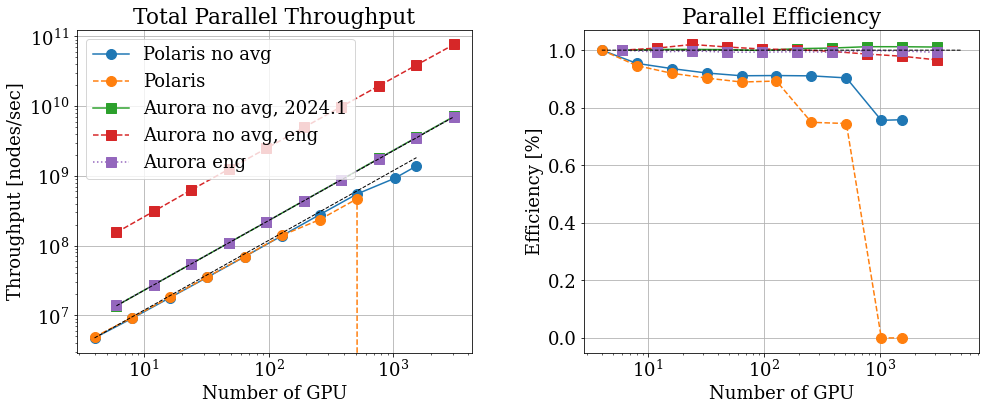

In [10]:
# Average parallel training throughput

polaris_gpu_list = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 1536]
aurora_gpu_list = [6, 12, 24, 48, 96, 192, 384, 768, 1536, 3072]

polaris_single_node = polaris.train_fom['throughput_par'][2]
polaris_ideal = [polaris_gpu_list[i]/polaris_gpu_list[0]*polaris_single_node for i in range(len(polaris_gpu_list))]
polaris2_single_node = polaris2.train_fom['throughput_par'][2]
polaris2_ideal = [polaris_gpu_list[i]/polaris_gpu_list[0]*polaris2_single_node for i in range(len(polaris_gpu_list))]

aurora_single_node = aurora.train_fom['throughput_par'][3]
aurora_ideal = [aurora_gpu_list[i]/aurora_gpu_list[0]*aurora_single_node for i in range(len(aurora_gpu_list))]
aurora_ccl_single_node = aurora_ccl.train_fom['throughput_par'][3]
aurora_ccl_ideal = [aurora_gpu_list[i]/aurora_gpu_list[0]*aurora_ccl_single_node for i in range(len(aurora_gpu_list))]
aurora_ccl2_single_node = aurora_ccl2.train_fom['throughput_par'][3]
aurora_ccl2_ideal = [aurora_gpu_list[i]/aurora_gpu_list[0]*aurora_ccl2_single_node for i in range(len(aurora_gpu_list))]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
axs[0].plot(polaris_gpu_list, polaris.train_fom['throughput_par'][2:],label = "Polaris no avg",marker="o",ls="-",markersize=10)
axs[0].plot(polaris_gpu_list, polaris2.train_fom['throughput_par'][2:],label = "Polaris",marker="o",ls="--",markersize=10)
axs[0].plot(polaris_gpu_list, polaris_ideal,c="k",ls="--",linewidth=1)
axs[0].plot(aurora_gpu_list, aurora.train_fom['throughput_par'][3:],label = "Aurora no avg, 2024.1",marker="s",ls="-",markersize=10)
axs[0].plot(aurora_gpu_list, aurora_ccl.train_fom['throughput_par'][3:],label = "Aurora no avg, eng",marker="s",ls="--",markersize=10)
axs[0].plot(aurora_gpu_list, aurora_ccl2.train_fom['throughput_par'][3:],label = "Aurora eng",marker="s",ls=":",markersize=10)
axs[0].plot(aurora_gpu_list, aurora_ideal,c="k",ls="--",linewidth=1)

axs[1].plot(polaris_gpu_list, polaris.train_fom['throughput_par'][2:]/polaris_ideal,label = "Polaris",marker="o",ls="-",markersize=10)
axs[1].plot(polaris_gpu_list, polaris2.train_fom['throughput_par'][2:]/polaris2_ideal,label = "Polaris",marker="o",ls="--",markersize=10)
axs[1].plot(aurora_gpu_list, aurora.train_fom['throughput_par'][3:]/aurora_ideal,label = "Aurora",marker="s",ls="-",markersize=10)
axs[1].plot(aurora_gpu_list, aurora_ccl.train_fom['throughput_par'][3:]/aurora_ccl_ideal,label = "Aurora",marker="s",ls="--",markersize=10)
axs[1].plot(aurora_gpu_list, aurora_ccl2.train_fom['throughput_par'][3:]/aurora_ccl2_ideal,label = "Aurora",marker="s",ls=":",markersize=10)
axs[1].plot([i for i in range(4,5000)], [1 for i in range(4,5000)],c="k",ls="--",linewidth=1)


for i in range(2):
    axs[i].set_xscale("log")
    axs[i].grid()
    axs[i].set_xlabel('Number of GPU')

axs[0].set_yscale("log")
#fig.legend(bbox_to_anchor=(1.25,0.7))
axs[0].legend(loc='upper left')
axs[0].set_ylabel('Throughput [nodes/sec]')
axs[0].set_title('Total Parallel Throughput')
axs[1].set_ylabel('Efficiency [%]')
axs[1].set_title('Parallel Efficiency')
fig.tight_layout(pad=3.0)

In [ ]:
aurora.train_fom['throughput_par']

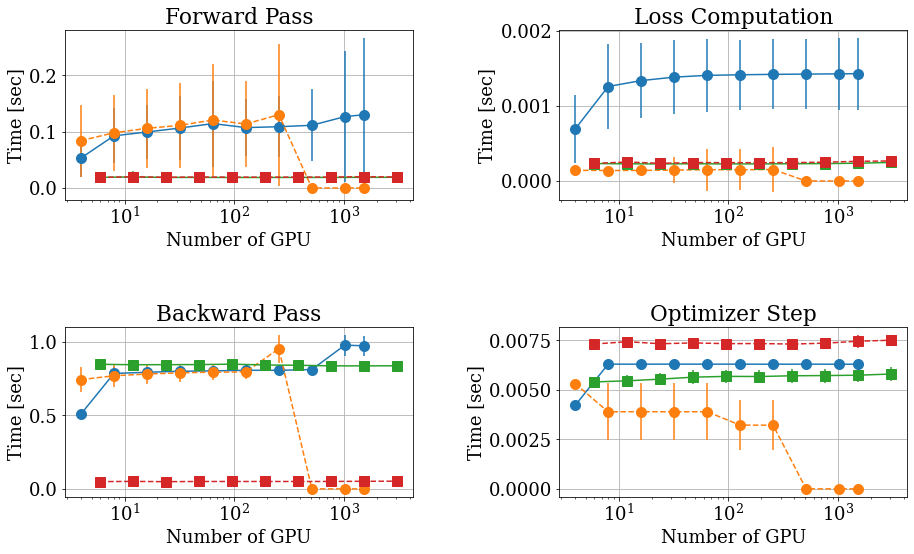

In [6]:
# Iteration timings

polaris_gpu_list = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 1536]
aurora_gpu_list = [6, 12, 24, 48, 96, 192, 384, 768, 1536, 3072]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 9))
axs[0,0].errorbar(polaris_gpu_list, polaris.train_fom['forward_pass'][2:,2],polaris.train_fom['forward_pass'][2:,3],label = "Polaris",marker="o",ls="-",markersize=10)
axs[0,0].errorbar(polaris_gpu_list, polaris2.train_fom['forward_pass'][2:,2],polaris2.train_fom['forward_pass'][2:,3],label = "Polaris",marker="o",ls="--",markersize=10)
axs[0,0].errorbar(aurora_gpu_list, aurora.train_fom['forward_pass'][3:,2],aurora.train_fom['forward_pass'][3:,3],label = "Aurora",marker="s",ls="-",markersize=10)
axs[0,0].errorbar(aurora_gpu_list, aurora_ccl2.train_fom['forward_pass'][3:,2],aurora_ccl2.train_fom['forward_pass'][3:,3],label = "Aurora",marker="s",ls="--",markersize=10)

axs[0,1].errorbar(polaris_gpu_list, polaris.train_fom['loss'][2:,2],polaris.train_fom['loss'][2:,3],label = "Polaris",marker="o",ls="-",markersize=10)
axs[0,1].errorbar(polaris_gpu_list, polaris2.train_fom['loss'][2:,2],polaris2.train_fom['loss'][2:,3],label = "Polaris",marker="o",ls="--",markersize=10)
axs[0,1].errorbar(aurora_gpu_list, aurora.train_fom['loss'][3:,2],aurora.train_fom['loss'][3:,3],label = "Aurora",marker="s",ls="-",markersize=10)
axs[0,1].errorbar(aurora_gpu_list, aurora_ccl2.train_fom['loss'][3:,2],aurora_ccl2.train_fom['loss'][3:,3],label = "Aurora",marker="s",ls="--",markersize=10)

axs[1,0].errorbar(polaris_gpu_list, polaris.train_fom['backward_pass'][2:,2],polaris.train_fom['backward_pass'][2:,3],label = "Polaris",marker="o",ls="-",markersize=10)
axs[1,0].errorbar(polaris_gpu_list, polaris2.train_fom['backward_pass'][2:,2],polaris2.train_fom['backward_pass'][2:,3],label = "Polaris",marker="o",ls="--",markersize=10)
axs[1,0].errorbar(aurora_gpu_list, aurora.train_fom['backward_pass'][3:,2],aurora.train_fom['backward_pass'][3:,3],label = "Aurora",marker="s",ls="-",markersize=10)
axs[1,0].errorbar(aurora_gpu_list, aurora_ccl2.train_fom['backward_pass'][3:,2],aurora_ccl2.train_fom['backward_pass'][3:,3],label = "Aurora",marker="s",ls="--",markersize=10)


axs[1,1].errorbar(polaris_gpu_list, polaris.train_fom['optimizer_step'][2:,2],polaris.train_fom['optimizer_step'][2:,3],label = "Polaris",marker="o",ls="-",markersize=10)
axs[1,1].errorbar(polaris_gpu_list, polaris2.train_fom['optimizer_step'][2:,2],polaris2.train_fom['optimizer_step'][2:,3],label = "Polaris",marker="o",ls="--",markersize=10)
axs[1,1].errorbar(aurora_gpu_list, aurora.train_fom['optimizer_step'][3:,2],aurora.train_fom['optimizer_step'][3:,3],label = "Aurora",marker="s",ls="-",markersize=10)
axs[1,1].errorbar(aurora_gpu_list, aurora_ccl2.train_fom['optimizer_step'][3:,2],aurora_ccl2.train_fom['optimizer_step'][3:,3],label = "Aurora",marker="s",ls="--",markersize=10)


for i in range(2):
    for j in range(2):
        axs[i,j].set_xscale("log")
        axs[i,j].grid()
        axs[i,j].set_xlabel('Number of GPU')
        axs[i,j].set_ylabel('Time [sec]')

axs[0,0].set_title('Forward Pass')
axs[0,1].set_title('Loss Computation')
axs[1,0].set_title('Backward Pass')
axs[1,1].set_title('Optimizer Step')
fig.tight_layout(pad=3.0)

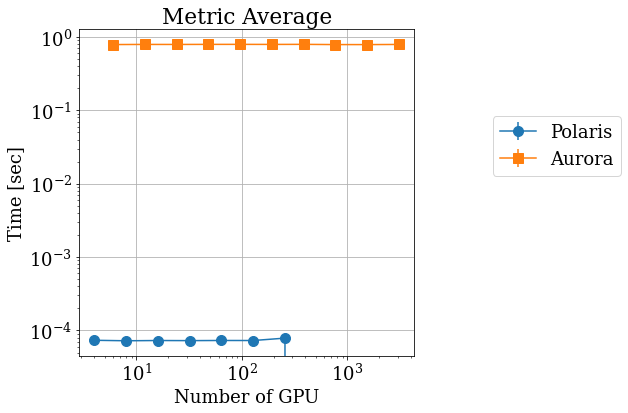

In [7]:
# Metric average for loss

polaris_gpu_list = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 1536]
aurora_rank_list = [6, 12, 24, 48, 96, 192, 384, 768, 1536, 3072]

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
axs.errorbar(polaris_gpu_list, polaris2.train_fom['collectives'][2:,2],polaris2.train_fom['collectives'][2:,3],label = "Polaris",marker="o",ls="-",markersize=10)
axs.errorbar(aurora_gpu_list, aurora_ccl2.train_fom['collectives'][3:,2],aurora_ccl2.train_fom['collectives'][3:,3],label = "Aurora",marker="s",ls="-",markersize=10)

axs.set_yscale("log")
axs.set_xscale("log")
axs.grid()
axs.set_xlabel('Number of GPU')
axs.set_ylabel('Time [sec]')

axs.set_title('Metric Average')
fig.legend(bbox_to_anchor=(1.4,0.7))
#axs[0,1].set_title('Loss Computation')
#axs[1,0].set_title('Backward Pass')
#axs[1,1].set_title('Optimizer Step')
#fig.tight_layout(pad=3.0)